In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PySimpleGUI as sg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy.signal import chirp, spectrogram
import scipy.fft as fft
import os
import nidaqmx as ni
from nidaqmx.constants import WAIT_INFINITELY
from nidaqmx.constants import Slope
from nidaqmx.constants import TaskMode

In [2]:
%run Variables_Functions.ipynb
%run Tabs.ipynb

The current working directory is /home/ian/Acoustic-Analysis-master


1
i =  1
k =  1
1
i =  2
k =  2
1


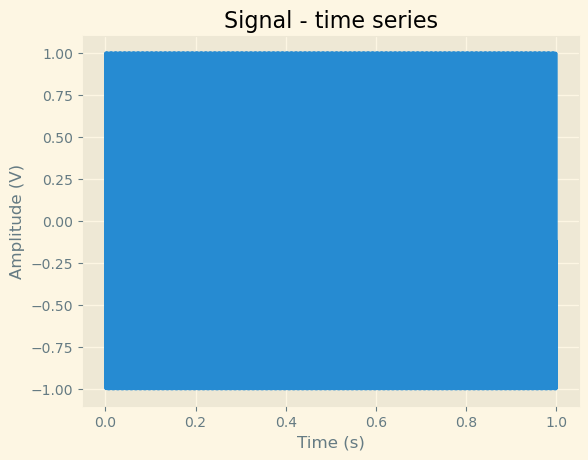

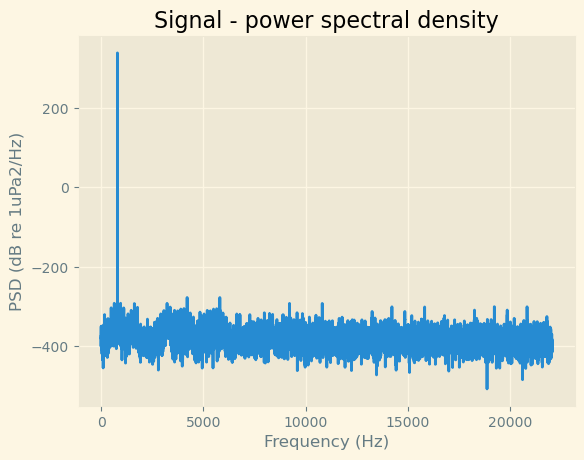

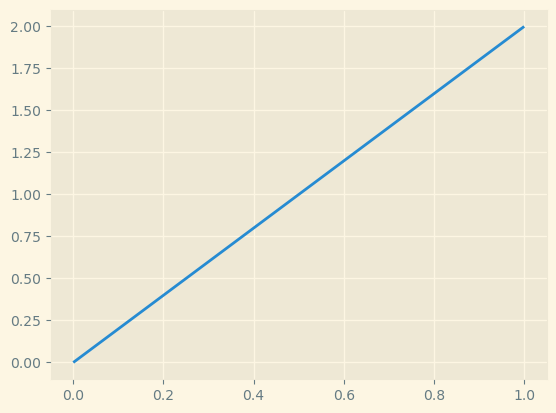

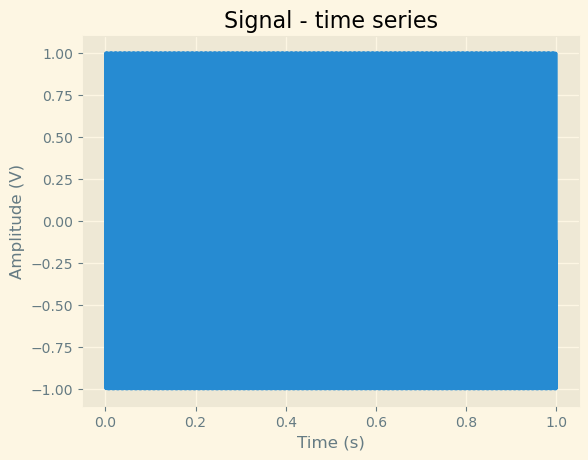

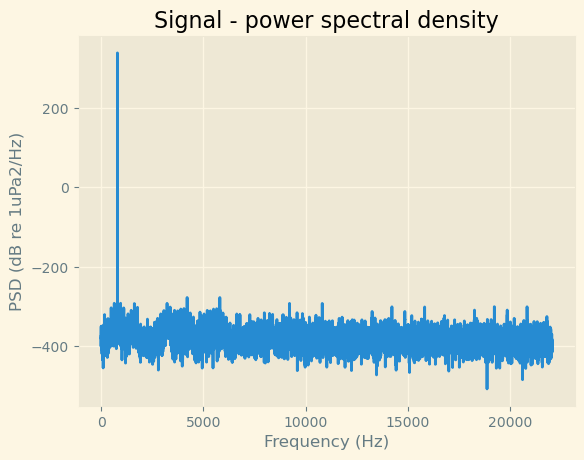

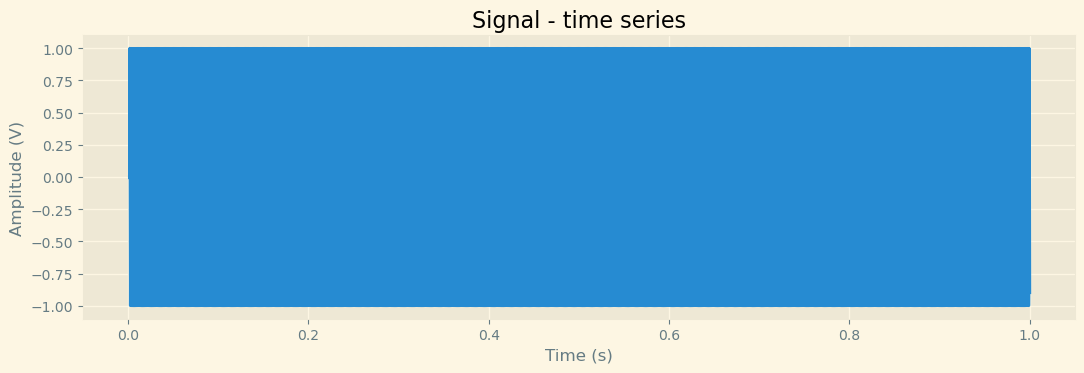

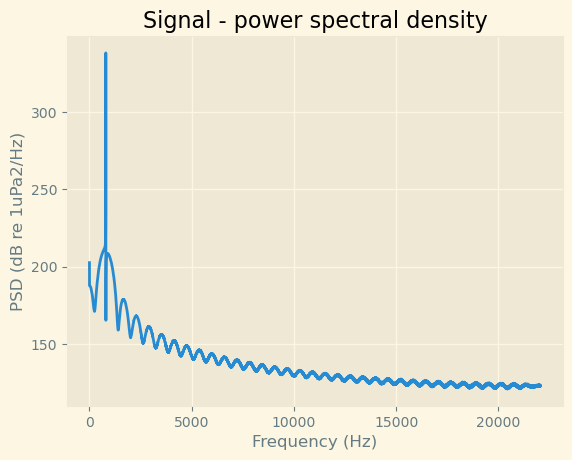

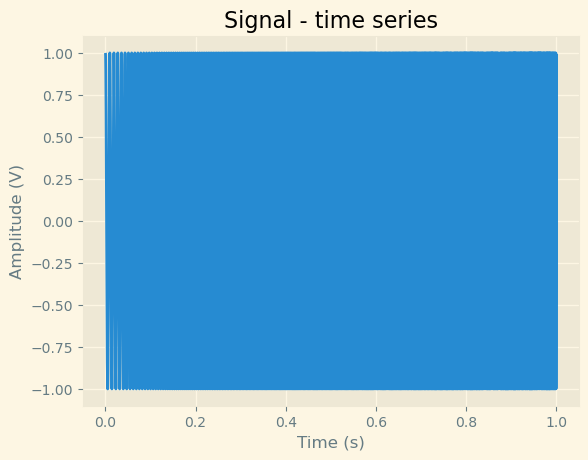

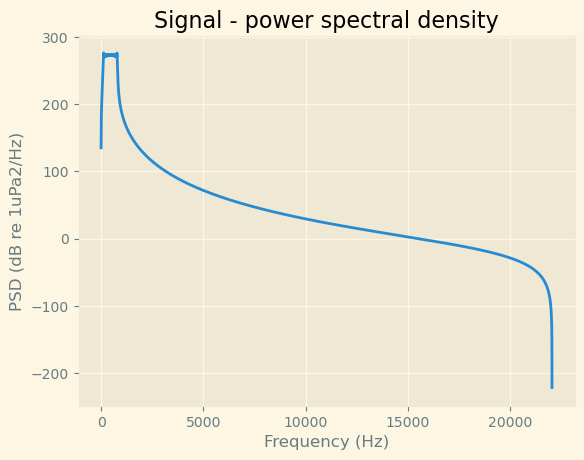

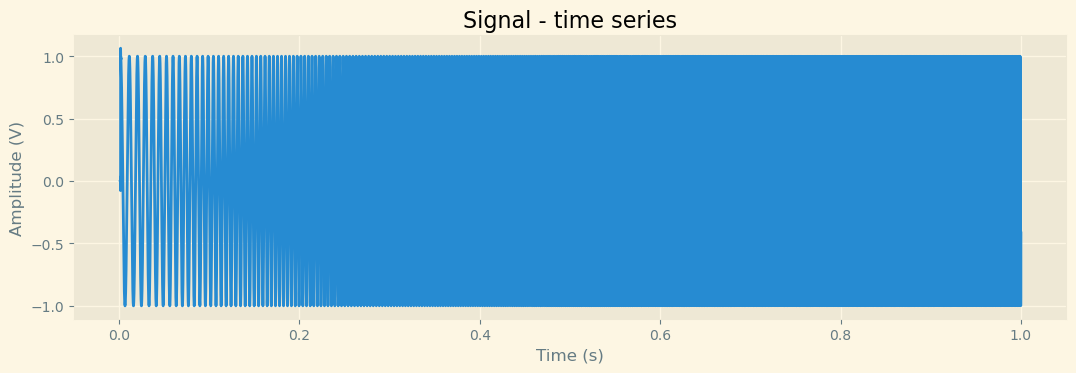

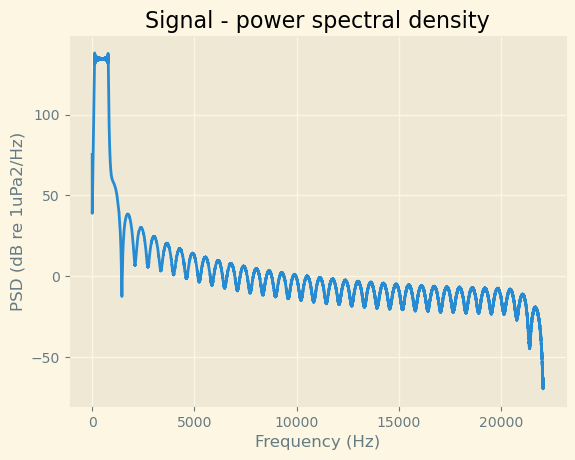

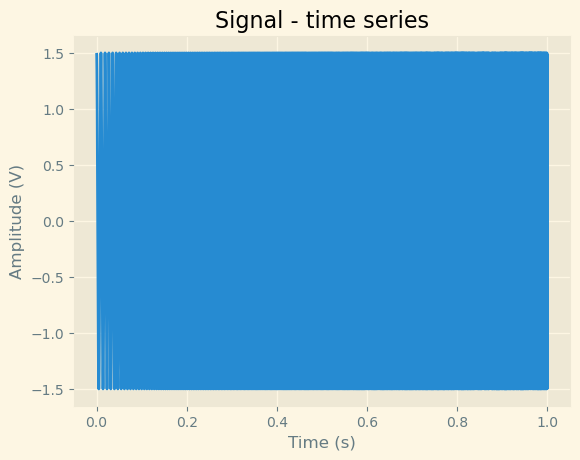

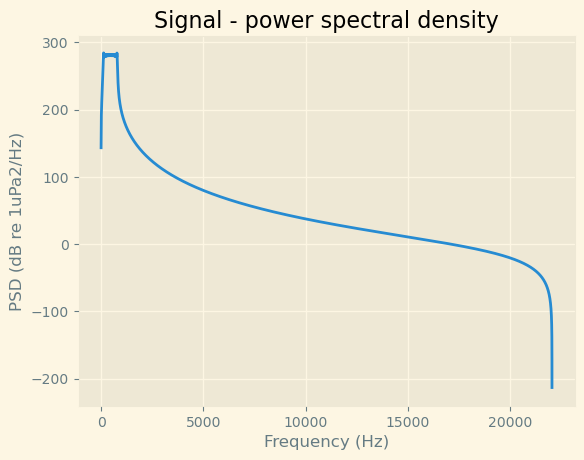

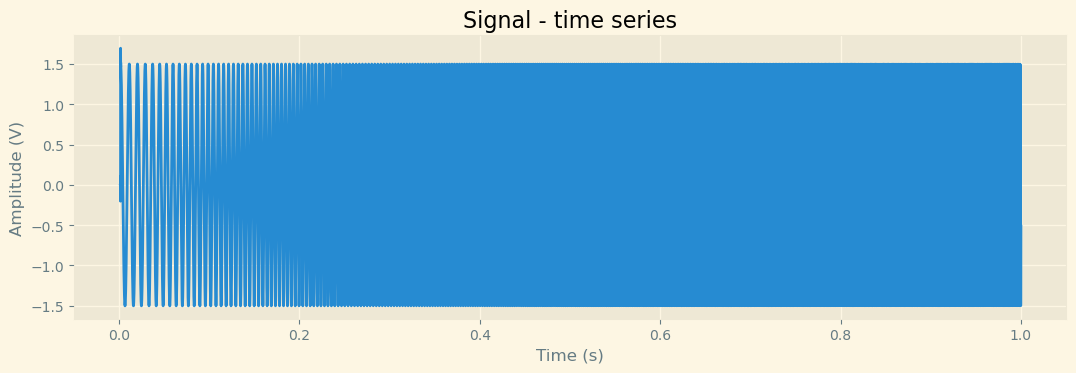

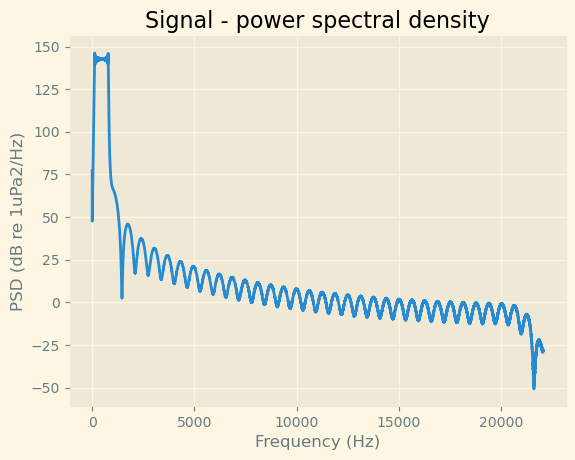

In [3]:
i = 0 # Use i so we can make multiple recordings in the same folder
j = 0 # Use j so we can update the measured graphs
k = 0 # Use k so we can make a new wave file
tab_group = [
                [sg.TabGroup(
                    [[
                        sg.Tab('Configuration', FrontPage_layout, background_color = '#FDF6E3'),
                        sg.Tab('Signal Generation', SigGen_layout, background_color = '#FDF6E3'),                 
                        sg.Tab('Measurement', Measurement_layout, background_color = '#FDF6E3')
                    ]],
                    tab_location = 'centertop',
                    title_color = 'Black', 
                    tab_background_color = '#C4BEAC',
                    selected_title_color = 'Black',
                    selected_background_color = '#E4FAFF',
                    background_color = '#FDF6E3'),
                    sg.Button('Exit')  
                ]
            ]
         

_VARS['window'] = sg.Window('Random Samples',
                            tab_group,
                            finalize=True,
                            resizable=True,
                            location=(100, 100),
                            element_justification="center",
                            background_color='#FDF6E3')


drawTimeSeriesTx()
drawPSDTx()
drawRMS()



# MAIN LOOP
while True:
    event, values = _VARS['window'].read(timeout=200)
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    elif event == 'Submit':
        generate_directory_name(str(values['-directory_name-']))
        #path = os.getcwd()
        #print ("The current working directory is %s" % path)
        #print ("The stored working directory is %s" % _VARS['directory_name'])
    elif event == 'Resample':
        updateChart()
    elif event == '-Slider-':
        updateData(int(values['-Slider-']))
    elif event == 'OK':
        updateParameters(float(values['-max_frequency-']),float(values['-frequency-']), \
                         float(values['-peak_amplitude-']),float(values['-sampling_rate-']), \
                         float(values['-pulse_time-']), str(values['-pulse_type-']))
    elif event == 'Start':
        recordADC()
        print(j)
        

        
        # print(int(values['-Slider-']))
_VARS['window'].close()


In [2]:
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is /Users/iandownie/Hydrophones/Acoustic Analysis


In [4]:
print(int(_VARS['sampling_rate']))

44100


In [ ]:
plt.plot(indata)